In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv("D:/PythonPractise/heart-disease-dataset/framingham.csv")

In [4]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
df = data.dropna()

In [6]:
feature_names = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']

In [7]:
scaler = StandardScaler()

In [8]:
X = df.drop(['TenYearCHD'],axis=1)
y = df['TenYearCHD']

In [9]:
X[feature_names] = scaler.fit_transform(X[feature_names])

In [10]:
model_lg = LogisticRegression(max_iter=10000)

In [35]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.4)

In [36]:
model_lg.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [37]:
y_pred = model_lg.predict(x_test)

In [38]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.849624060150376


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

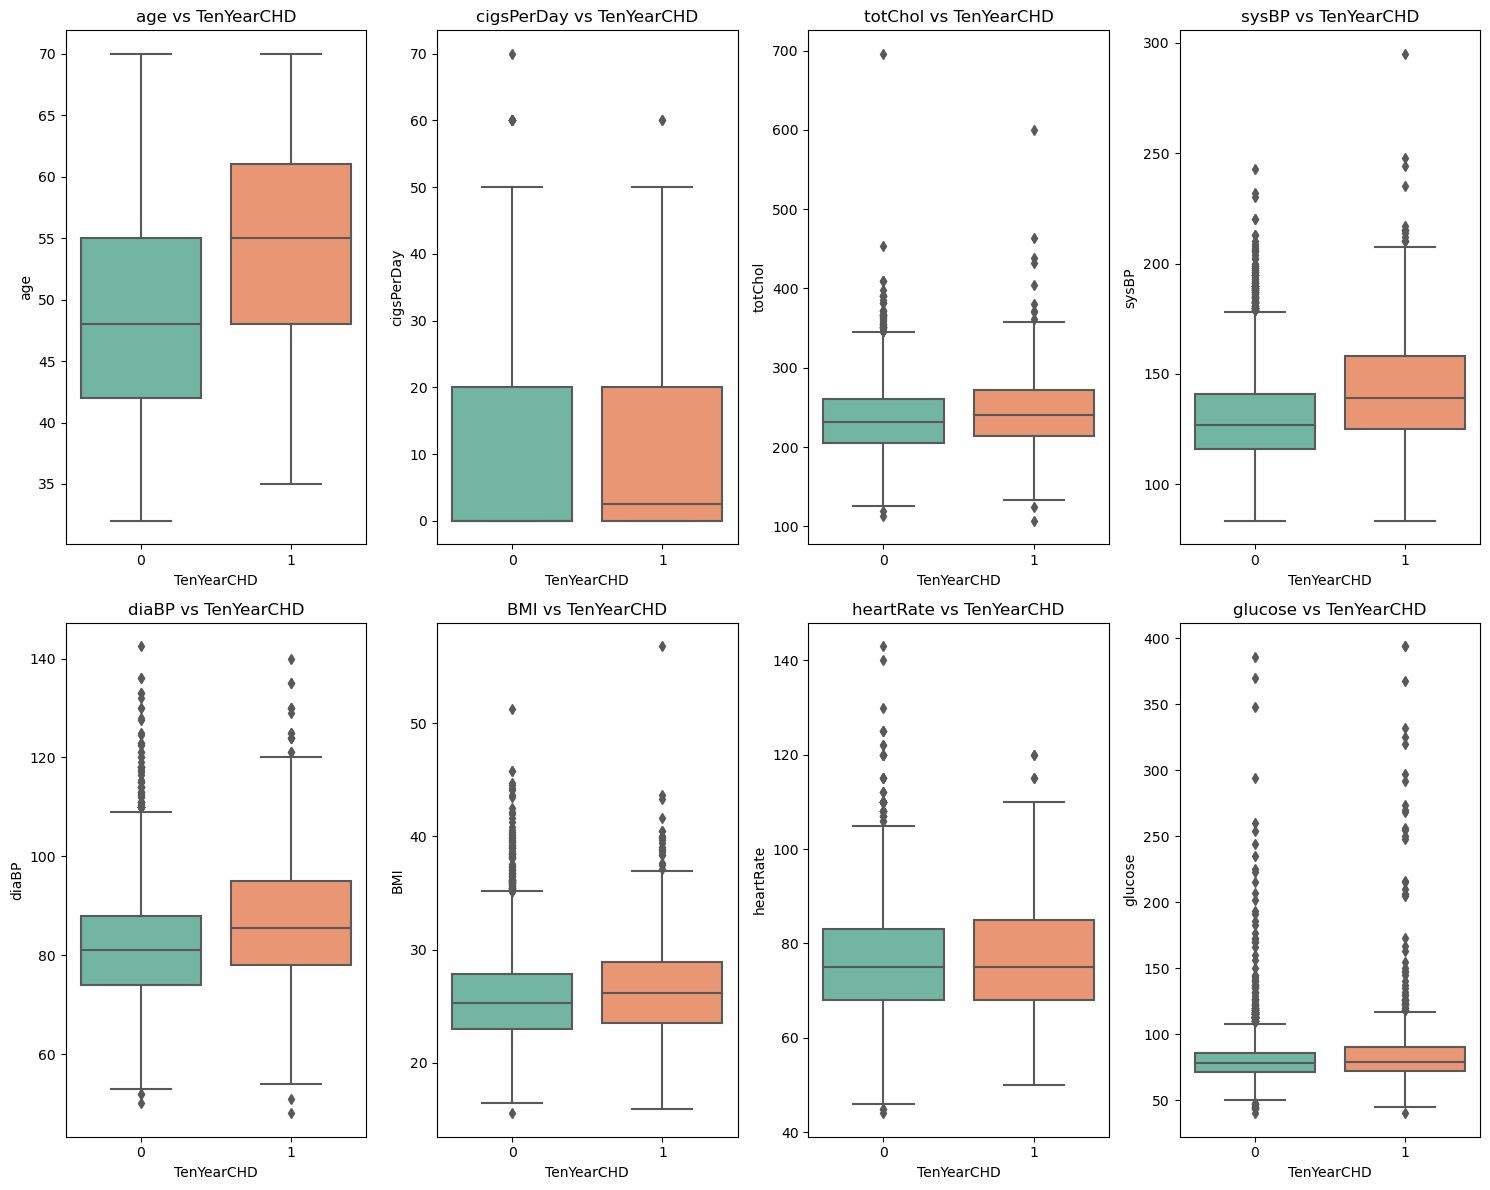

In [21]:
plt.figure(figsize=(15, 12))

# Selected features for visualization
features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
target = 'TenYearCHD'

# Generate a 2x4 grid of plots
for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=data, x=target, y=feature, palette="Set2")
    plt.title(f"{feature} vs {target}")

plt.tight_layout()
plt.show()

In [39]:
confuse = confusion_matrix(y_test,y_pred)
print(confuse)

[[1224   10]
 [ 210   19]]


In [55]:
data1 = {
     'male': [1],
    'age': [27],
    'education': [4],
    'currentSmoker': [1],
    'cigsPerDay': [40],
    'BPMeds': [1],
    'prevalentStroke': [0],
    'prevalentHyp': [0],
    'diabetes': [0],
    'totChol': [240],
    'sysBP': [190],
    'diaBP': [90],
    'BMI': [27.5],
    'heartRate': [75],
    'glucose': [110]
    
}

In [56]:
dt = pd.DataFrame(data1)

In [57]:
dt_scaled = scaler.transform(dt)

In [58]:
dt_scaled = pd.DataFrame(dt_scaled,columns=feature_names)

In [59]:
test = model_lg.predict(dt_scaled)

In [60]:
test

array([0], dtype=int64)

In [47]:
dt_scaled

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.119825,-0.298768,1.975752,1.022127,2.599415,5.651277,13.156566,1.486551,-0.166831,0.070921,2.60903,0.591984,0.422058,-0.060977,1.17723


In [48]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [61]:
import joblib as jb

In [62]:
jb.dump(model_lg,'heart_disease_model.pkl')

['heart_disease_model.pkl']

In [63]:
jb.dump(scaler,'StandardScaler_HDModel.pkl')

['StandardScaler_HDModel.pkl']